In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error, mean_absolute_error,
)

from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut
)
from sklearn.datasets import load_iris, load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,4.9000,3.0000,1.4000,0.2000,Iris-setosa
2,4.7000,3.2000,1.3000,0.2000,Iris-setosa
3,4.6000,3.1000,1.5000,0.2000,Iris-setosa
4,5.0000,3.6000,1.4000,0.2000,Iris-setosa
5,5.4000,3.9000,1.7000,0.4000,Iris-setosa
6,4.6000,3.4000,1.4000,0.3000,Iris-setosa
7,5.0000,3.4000,1.5000,0.2000,Iris-setosa
8,4.4000,2.9000,1.4000,0.2000,Iris-setosa
9,4.9000,3.1000,1.5000,0.1000,Iris-setosa


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.9130434782608695
0.9074074074074074


<Axes: >

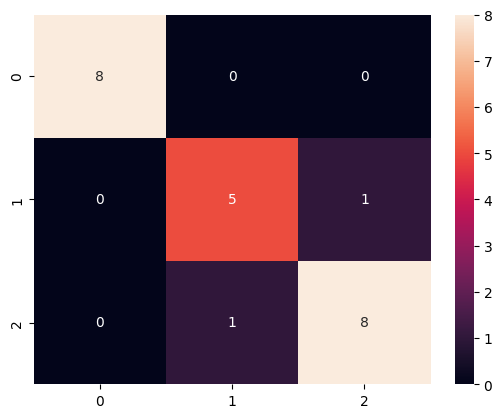

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


In [10]:
kf = KFold(n_splits=3, shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [11]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print('Fold {}: Длина train: {}, Длина test: {}'.format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длина train: 100, Длина test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длина train: 100, Длина test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97  98

In [12]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [13]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [14]:
print('Среднее по кросс-валидации: ', np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


In [15]:
cv_results = cross_val_score(model,                 # модель
                             X,                     # матрица признаков
                             y,                     # вектор цели
                             cv = kf,               # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',  # метрика
                             n_jobs=-1)             # используются все ядра CPU

print('Кросс-валидация: ', cv_results)
print('Среднее по кросс-валидации: ', cv_results.mean())
print('Дисперсия по кросс-валидации: ', cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


In [16]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [17]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f'Fold {i+1}:')
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [18]:
cv_results = cross_val_score(model,                 # модель
                             X,                     # матрица признаков
                             y,                     # вектор цели
                             cv = skf,              # тип разбиения
                             scoring = 'f1_macro',  # метрика
                             n_jobs=-1)             # используются все ядра CPU

print('Кросс-валидация: ', cv_results)
print('Среднее по кросс-валидации: ', cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


In [19]:
loo = LeaveOneOut()

In [20]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f'Fold {i+1}:')
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [21]:
cv_results = cross_val_score(model,                 # модель
                             X,                     # матрица признаков
                             y,                     # вектор цели
                             cv = loo,              # тип разбиения
                             scoring = 'f1_macro',  # метрика
                             n_jobs=-1)             # используются все ядра CPU

print('Кросс-валидация: ', cv_results)
print('Среднее по кросс-валидации: ', cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


## Задания для самостоятельного выполнения
#### 1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы

In [22]:
lpo = LeavePOut(p=2)
cv_results = cross_val_score(model, X, y, cv=lpo, scoring='f1_macro', n_jobs=-1)

print('Кросс-валидация: ', cv_results)
print('Среднее по кросс-валидации: ', cv_results.mean())

Кросс-валидация:  [1. 1. 1. ... 1. 1. 1.]
Среднее по кросс-валидации:  0.9405219985085758


#### 2. Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [23]:
cv_results = cross_validate(model, X, y, cv=lpo, return_train_score=True, n_jobs=-1)
for name, val in cv_results.items():
    print(f'{name:<16} => {str(val):<76} => {val.mean():<10.4f}')

fit_time         => [0.00054097 0.00044918 0.0003829  ... 0.00040293 0.00035691 0.00034213]      => 0.0005    
score_time       => [0.00021124 0.00016403 0.00014186 ... 0.000139   0.00012732 0.00012493]      => 0.0002    
test_score       => [1. 1. 1. ... 1. 1. 1.]                                                      => 0.9550    
train_score      => [0.95945946 0.95945946 0.96621622 ... 0.96621622 0.96621622 0.96621622]      => 0.9625    


#### 3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [24]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

cv_results_metrics = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)

for name, val in cv_results_metrics.items():
    print(f'{name:<22} => {str(val):<58} => {val.mean():<10.4f}')

fit_time               => [0.00056195 0.00048089 0.00049806 0.00038028 0.00052881]   => 0.0005    
score_time             => [0.00168586 0.00157595 0.00161195 0.00142288 0.00160503]   => 0.0016    
test_accuracy          => [1.         0.96666667 0.93333333 0.9        1.        ]   => 0.9600    
test_precision_macro   => [1.         0.96969697 0.93333333 0.92307692 1.        ]   => 0.9652    
test_recall_macro      => [1.         0.96666667 0.93333333 0.9        1.        ]   => 0.9600    
test_f1_macro          => [1.         0.96658312 0.93333333 0.89769821 1.        ]   => 0.9595    


#### 4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [25]:
models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(), SVC(gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100)
]

models_named = {i.__class__.__name__:i for i in models}

for name, model in models_named.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
    print(f'{name:<24} => {scores.mean():<10.4f}')

LogisticRegression       => 0.9732    
KNeighborsClassifier     => 0.9732    
SVC                      => 0.9666    
DecisionTreeClassifier   => 0.9599    
RandomForestClassifier   => 0.9528    


#### 5. Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [26]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

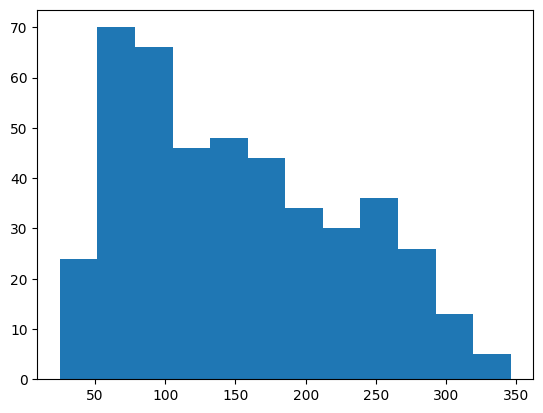

In [27]:
plt.hist(diabetes.target, bins=12)
plt.show()

In [28]:
X, y = diabetes.data, diabetes.target

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True)

scoring = {
    'r2_score': make_scorer(r2_score),
    'mean_squared_error': make_scorer(mean_squared_error),
    'mean_absolute_error': make_scorer(mean_absolute_error),
}

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=True, n_jobs=-1)

for name, val in cv_results.items():
    print(f'{name:<26} => {str(val):<72} => {val.mean():<10.4f}')

fit_time                   => [0.00102305 0.00069308 0.00035501 0.00022817 0.00021195]                 => 0.0005    
score_time                 => [0.00232482 0.00081778 0.00036693 0.00029898 0.00029492]                 => 0.0008    
test_r2_score              => [0.43355135 0.46844082 0.37650018 0.55168005 0.56389818]                 => 0.4788    
train_r2_score             => [0.53136785 0.52111098 0.55029162 0.50142389 0.50044457]                 => 0.5209    
test_mean_squared_error    => [3134.52458932 2774.25883582 3767.85830822 2768.08181396 2820.74531888]  => 3053.0938 
train_mean_squared_error   => [2822.95316981 2901.76866203 2653.89612821 2922.96721079 2891.86641047]  => 2838.6903 
test_mean_absolute_error   => [45.10143185 42.11406082 51.29678956 42.0301807  42.7163233 ]            => 44.6518   
train_mean_absolute_error  => [42.93792776 43.72195663 41.30834477 43.83379216 43.72535327]            => 43.1055   


#### 6. Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные. Для этого создайте конвейер с помощью make_pipeline из библиотеки sklearn.pipeline, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [29]:
iris = load_iris()
X, y = iris.data, iris.target

In [30]:
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
kf = KFold(n_splits=5, shuffle=True)

In [31]:
cv_result = cross_val_score(pipeline, X, y, cv=kf, scoring='f1_macro')
print(f'f1_macro => {cv_result.mean():.4f}')

f1_macro => 0.9678
